100%|██████████| 50/50 [00:35<00:00,  1.39it/s]


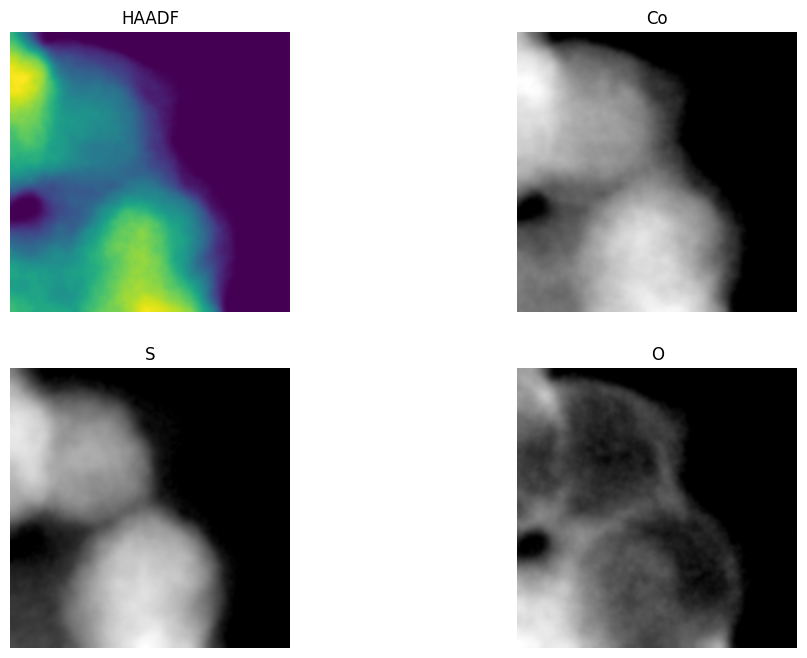

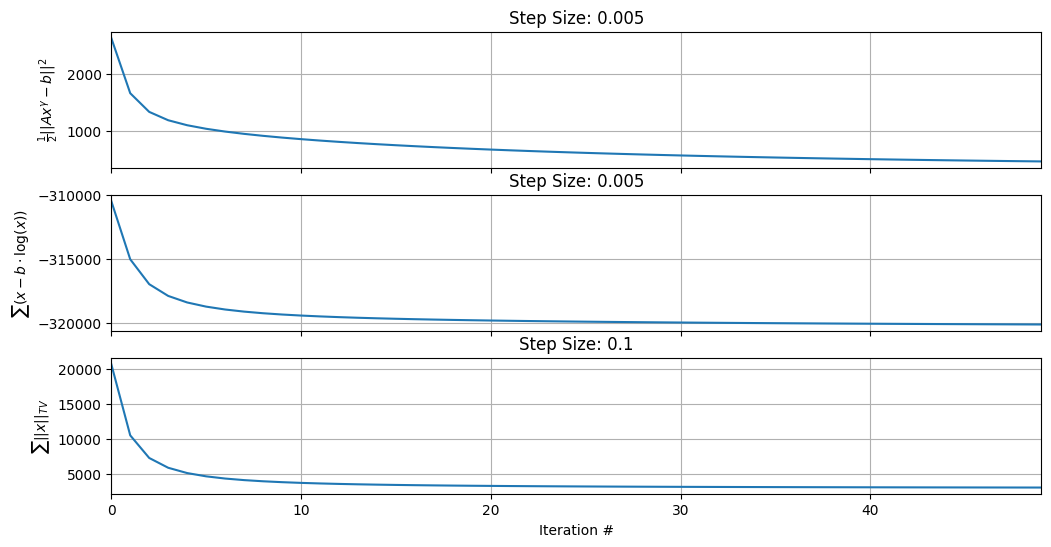

In [1]:
from multimodal_fusion import DataFusion

# Initialize fusion with list of elements
elements = ['Co', 'S', 'O']
fusion = DataFusion(elements)

# Load your chemical maps
# Provide as a dictionary where keys match your element list
# This helper function loads starter data from github
cobalt_map, sulfur_map, oxygen_map, haadf_im = fusion.load_edx_example()
chemical_maps = {
    'Co': cobalt_map,      # 2D numpy arrays
    'S': sulfur_map, 
    'O': oxygen_map
}
fusion.load_chemical_maps(chemical_maps)

# Load the simultaneously acquired HAADF image
fusion.load_haadf(haadf_im)  # 2D numpy array

# Run the fusion algorithm 
# We can adjust with regularization parameters
fusion.run(
    nIter=50,
    lambdaEDS = 0.005, lambdaTV=0.1,
    plot_images=True, plot_convergence=True)

# Get results in dictionary format
results = fusion.get_results()
fused_cobalt = results['Co']
fused_sulfur = results['S']